In [1]:
import ROOT

Welcome to JupyROOT 6.20/04


pen the rootfile and get the workspace from the exercise_0

In [2]:
fInput = ROOT.TFile("Workspace_mumufit.root")
ws = fInput.Get("ws")
ws.Print()


RooFit v3.60 -- Developed by Wouter Verkerke and David Kirkby 
                Copyright (C) 2000-2013 NIKHEF, University of California & Stanford University
                All rights reserved, please read http://roofit.sourceforge.net/license.txt


RooWorkspace(ws) ws contents

variables
---------
(NJpsi,Nbkg,a1,a2,a3,alphaJpsi,cross_psi,eff_psi,lumi_psi,mass,meanJpsi,meanpsi2S,nJpsi,sigmaJpsi)

p.d.f.s
-------
RooCBShape::CBJpsi[ m=mass m0=meanJpsi sigma=sigmaJpsi alpha=alphaJpsi n=nJpsi ] = 0.012173
RooCBShape::CBpsi2S[ m=mass m0=meanpsi2S sigma=sigmaJpsi alpha=alphaJpsi n=nJpsi ] = 0.00289326
RooChebychev::backgroundPDF[ x=mass coefList=(a1,a2,a3) ] = 1.35122
RooAddPdf::totPDF[ NJpsi * CBJpsi + Npsi * CBpsi2S + Nbkg * backgroundPDF ] = 0.91405

functions
--------
RooFormulaVar::Npsi[ actualVars=(eff_psi,lumi_psi,cross_psi) formula="x[0]*x[1]*x[2]" ] = 5.72535

datasets
--------
RooDataSet::data(mass)



ou can set constant parameters that are known<br>
f you leave them floating, the fit procedure will determine their uncertainty

In [3]:
ws.var("meanJpsi").setConstant(1)
ws.var("sigmaJpsi").setConstant(1)
ws.var("alphaJpsi").setConstant(1)
ws.var("nJpsi").setConstant(1)
ws.var("NJpsi").setConstant(1)
ws.var("meanpsi2S").setConstant(1)
ws.var("Nbkg").setConstant(1)
ws.var("a1").setConstant(1)
ws.var("a2").setConstant(1)
ws.var("a3").setConstant(1)

et the model know what is the parameter of interest

In [4]:
cross_psi = ws.var("cross_psi")
cross_psi.setRange(4., 16.)  #this is mostly for plotting reasons
poi = ROOT.RooArgSet(cross_psi)

onfigure the model

In [5]:
model = ROOT.RooStats.ModelConfig()
model.SetWorkspace(ws)
model.SetPdf("totPDF")
model.SetParametersOfInterest(poi)

et confidence level

In [6]:
confidenceLevel = 0.68

uild the profile likelihood calculator

In [7]:
plc = ROOT.RooStats.ProfileLikelihoodCalculator(ws.data("data"), model)
plc.SetParameters(poi)
plc.SetConfidenceLevel(confidenceLevel)

et the interval

In [8]:
pl_Interval = plc.GetInterval()

[#1] INFO:Minization -- p.d.f. provides expected number of events, including extended term in likelihood.
[#1] INFO:Minization -- createNLL: caching constraint set under name CONSTR_OF_PDF_totPDF_FOR_OBS_mass with 0 entries
[#0] PROGRESS:Minization -- ProfileLikelihoodCalcultor::DoGLobalFit - find MLE 
[#0] PROGRESS:Minization -- ProfileLikelihoodCalcultor::DoMinimizeNLL - using Minuit / Migrad with strategy 1
[#1] INFO:Minization -- RooMinimizer::optimizeConst: activating const optimization
[#1] INFO:Minization --  The following expressions have been identified as constant and will be precalculated and cached: (CBJpsi,CBpsi2S,backgroundPDF)
[#1] INFO:Minization -- 
  RooFitResult: minimized FCN value: -2191.54, estimated distance to minimum: 2.15568e-10
                covariance matrix quality: Full, accurate covariance matrix
                Status : MINIMIZE=0 

    Floating Parameter    FinalValue +/-  Error   
  --------------------  --------------------------
             cross_

ow let's determine the Bayesian probability interval<br>
e could use the standard Bayesian Calculator, but this would be very slow for the integration<br>
o we profit of the Markov-Chain MC capabilities of RooStats to speed things up

In [9]:
mcmc = ROOT.RooStats.MCMCCalculator(ws.data("data") , model)
mcmc.SetConfidenceLevel(confidenceLevel)
mcmc.SetNumIters(20000)           #Metropolis-Hastings algorithm iterations
mcmc.SetNumBurnInSteps(100)       #first N steps to be ignored as burn-in
mcmc.SetLeftSideTailFraction(0.5) #for central interval

In [10]:
MCMC_interval = mcmc.GetInterval()

[#1] INFO:Minization -- p.d.f. provides expected number of events, including extended term in likelihood.
[#1] INFO:Minization -- createNLL picked up cached consraints from workspace with 0 entries
Metropolis-Hastings progress: ....................................................................................................
[#1] INFO:Eval -- Proposal acceptance rate: 94.485%
[#1] INFO:Eval -- Number of steps in chain: 18897


et's make a plot

In [11]:
dataCanvas = ROOT.TCanvas("dataCanvas")
dataCanvas.Divide(2,1)

In [12]:
dataCanvas.cd(1)
plot_Interval = ROOT.RooStats.LikelihoodIntervalPlot(pl_Interval)
plot_Interval.SetTitle("Profile Likelihood Ratio")
plot_Interval.SetMaximum(3.)
plot_Interval.Draw()

[#1] INFO:Minization -- RooProfileLL::evaluate(nll_totPDF_data_Profile[cross_psi]) Creating instance of MINUIT
[#1] INFO:Minization -- RooProfileLL::evaluate(nll_totPDF_data_Profile[cross_psi]) determining minimum likelihood for current configurations w.r.t all observable
[#1] INFO:Minization -- RooProfileLL::evaluate(nll_totPDF_data_Profile[cross_psi]) minimum found at (cross_psi=11.907)

[#1] INFO:Minization -- RooProfileLL::evaluate(nll_totPDF_data_Profile[cross_psi]) Creating instance of MINUIT
[#1] INFO:Minization -- RooProfileLL::evaluate(nll_totPDF_data_Profile[cross_psi]) determining minimum likelihood for current configurations w.r.t all observable
[#0] ERROR:InputArguments -- RooArgSet::checkForDup: ERROR argument with name cross_psi is already in this set
[#1] INFO:Minization -- RooProfileLL::evaluate(nll_totPDF_data_Profile[cross_psi]) minimum found at (cross_psi=11.907)
........................................................................................................

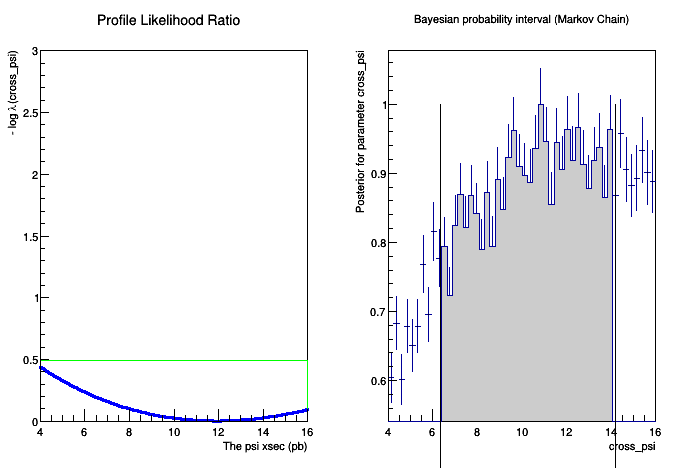

In [15]:
dataCanvas.cd(2)
plot_MCMC = ROOT.RooStats.MCMCIntervalPlot(MCMC_interval)
plot_MCMC.SetTitle("Bayesian probability interval (Markov Chain)")
plot_MCMC.Draw()
dataCanvas.Draw()

In [16]:
dataCanvas.SaveAs("exercise_4.png")

Info in <TCanvas::Print>: png file exercise_4.png has been created


ow print the interval for mH for the two methods

In [17]:
print ("PLC interval is [", pl_Interval.LowerLimit(cross_psi), ", ", pl_Interval.UpperLimit(cross_psi), "]")

PLC interval is [ 4.0 ,  16.0 ]


In [18]:
print ("Bayesian interval is [", MCMC_interval.LowerLimit(cross_psi), ", ", MCMC_interval.UpperLimit(cross_psi), "]")

Bayesian interval is [ 6.358504608273506 ,  14.198942668735981 ]


yROOT sometimes fails cleaning memory, this helps

In [19]:
del plc